In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

from FRespuestastyfdefiltrosFIReIIR import FIRrespt, FIRrespf, IIRrespt, IIRrespf

import scipy.signal as ss  

importing Jupyter notebook from FRespuestastyfdefiltrosFIReIIR.ipynb


<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-20 a la(s) 20.44.45.png">

## Apartado A

    y(n) = n.x(n-1) + 3.x(n-5) sistema FIR

    Considero n ∈ [0,6]

    n=0 -> y(0) = 0.x(-1) + 3.x(-5) = 0+0 = 0 -> y(0) = 0
    n=1 -> y(1) = 1.x(0) + 3.x(-4) = 1+0 = 0 -> y(1) = 1
    n=2 -> y(2) = 2.x(1) + 3.x(-3) = 0+0 = 0 -> y(2) = 0
    n=3 -> y(3) = 3.x(2) + 3.x(-2) = 0+0 = 0 -> y(3) = 0
    n=4 -> y(4) = 4.x(3) + 3.x(-1) = 0+0 = 0 -> y(4) = 0
    n=5 -> y(5) = 5.x(4) + 3.x(0) = 0+3 = 0 -> y(5) = 3
    n=6 -> y(6) = 6.x(5) + 3.x(1) = 0+0 = 0 -> y(6) = 0
    El resto de las respuestas es 0.

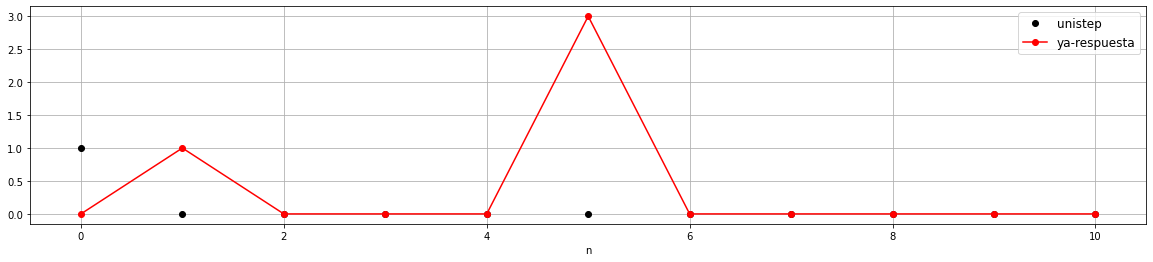

In [3]:
na = np.arange (0,11)
unistep = lambda n: np.piecewise (n, [(n==0)], [lambda n: 1,lambda n: 0])
ya = lambda n: np.piecewise (n, [(n==1),(n==5)], [lambda n: 1,lambda n: 3,lambda n: 0])

plt.figure (figsize=(20,4))
plt.plot (na,unistep(na),"ko",label="unistep")
plt.plot (na,ya(na),"ro-",label="ya-respuesta")
plt.xlabel ("n")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

## Apartado B

    y(n) = (-4/3).y(n-2) + 6.y(n-4) + x(n) bajo condición de reposo.

    y(n) + (4/3).y(n-2) - 6.y(n-4) = x(n) sistema IIR

    Considero n ∈ (0,5)

    n=0 -> y(0) + (4/3).y(-2) - 6.y(-4) = x(0) -> y(0) = 1-0+0 = 1 -> y(0) = 1
    n=1 -> y(1) + (4/3).y(-1) - 6.y(-3) = x(1) -> y(1) = 0-0+0 = 0 -> y(1) = 0
    n=2 -> y(2) + (4/3).y(0) - 6.y(-2) = x(2) -> y(2) = 0-(4/3)+ 0 = -4/3 -> y(2) = -4/3
    n=3 -> y(3) + (4/3).y(1) - 6.y(-1) = x(3) -> y(3) = 0-0+0 = 0 -> y(3) = 0
    n=4 -> y(4) + (4/3).y(2) - 6.y(0) = x(4) -> y(4) = 0+(16/9)+6 = 70/9 -> y(4) = 70/9
    n=5 -> y(5) + (4/3).y(3) - 6.y(1) = x(5) -> y(5) = 0-0+0 = 0 -> y(5) = 0
    n=6 -> y(6) + (4/3).y(4) - 6.y(2) = x(6) -> y(6) = 0-(280/27)-8 = 0 -> y(6) = -496/27
    n=7 -> y(7) + (4/3).y(5) - 6.y(3) = x(7) -> y(7) = 0-0+0 = 0 -> y(7) = 0
    ...

In [4]:
#COEFICIENTES X
cb = np.array ([1,0,0,0,0])

#VECTOR DE Y
db = np.array ([1,0,4/3,0,-6])

wb = np.arange (-np.pi,np.pi,0.001)

H_IIb = IIRrespf (wb,cb,db) #en frencuencia

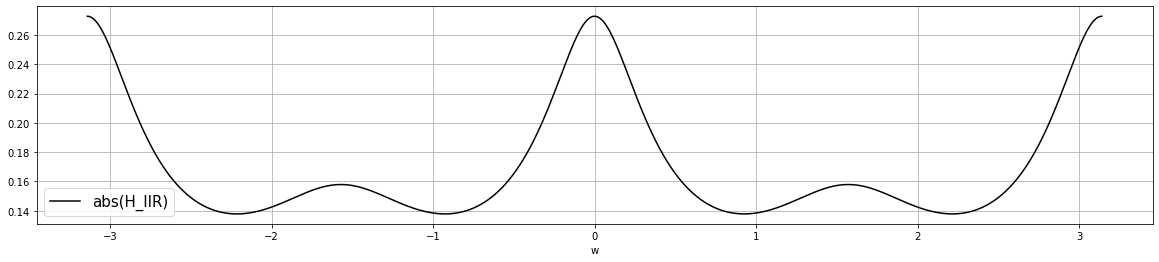

In [6]:
plt.figure (figsize=(20,4))
plt.plot (H_IIb[:,0],H_IIb[:,1],"k",label="abs(H_IIR)")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

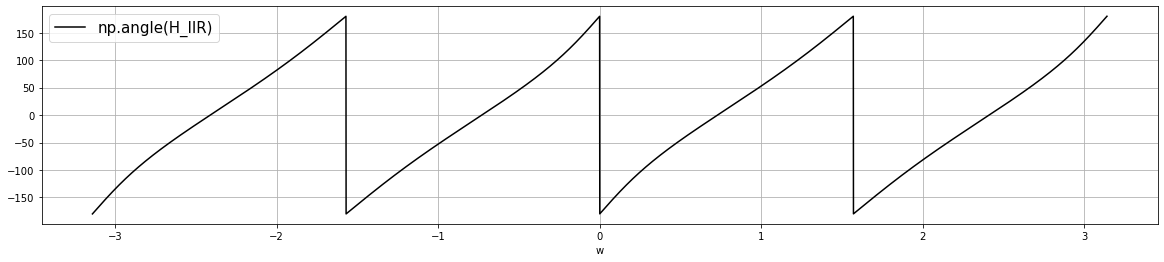

In [7]:
plt.figure (figsize=(20,4))
plt.plot (H_IIb[:,0],H_IIb[:,2]*180/np.pi,label="np.angle(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

In [8]:
H_IIbt = IIRrespt (unistep(na),cb,db) #en tiempo

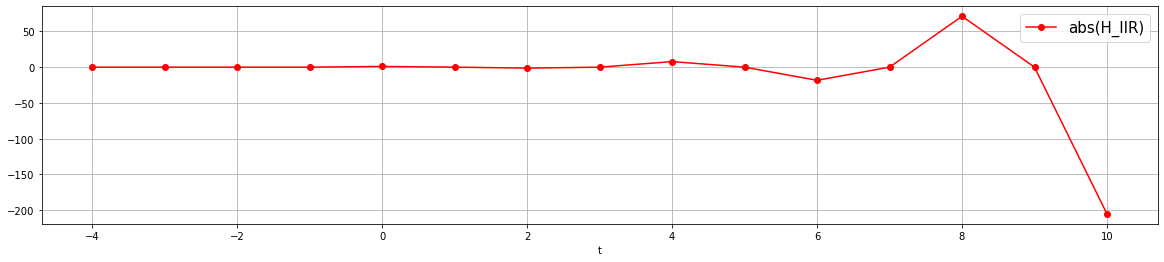

In [9]:
plt.figure (figsize=(20,4))
plt.plot (H_IIbt[:,0],H_IIbt[:,1],"o-",label="abs(H_IIR)",color="red")
plt.xlabel ("t")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-20 a la(s) 20.47.26.png">

## Apartado A

    y(n) = A.x(n) + B

    Suponemos dos entradas: x1(n) y x2(n)
    La respuesta a x1: y1(n) = A.x1(n) + B
    La respuesta a x2: y2(n) = A.x2(n) + B

    - Analizamos Linealidad:

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = A [a.x1(n) + b.x2(n)] + B = A.a.x1(n) + A.b.x2(n) + B 
    a.y1(n) + b.y2(n) = (a.A.x1(n) + a.B) + (b.A.x2(n) + b.B)
    Por lo tanto NO es líneal.


    - Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = A.x1(n-n0) + B 
    y1 (n - n0) = a.x1(n-n0) + B 
    Por lo tanto, es invariante en el tiempo.


    - Analizamos Causalidad:

    n = -1 -> y(-1) = A.x(-1) + B 
    n = 1 -> y(1) = A.x(1) + B 
    Entonces es un sistema causal, la salida actual y(n) depende de la entrada actual x(n).

## Apartado B

    y(n) = x(n^2) 

    Suponemos dos entradas: x1(n) y x2(n)
    La respuesta a x1: y1(n) = x1(n^2) 
    La respuesta a x2: y2(n) = x2(n^2) 

    - Analizamos Linealidad:

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.[ x1(n^2) ] + b.[ x2(n^2) ] = a.y1(n) + b.y2(n)
    Por lo tanto es líneal.


    - Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = x1(n^2-n0) 
    y1 (n - n0) = x1((n-n0)^2) = x1(n^2-2.n.n0+n0^2)   
    Por lo tanto, es NO invariante en el tiempo.


    - Analizamos Causalidad:

    n = -1 -> y(-1) = x(1)  
    Entonces es un sistema NO causal; la salida actual es y(-1), depende de una entrada futura x(1).

## Apartado C

    y(n) = A.x(n).cos(w0.n) 

    Suponemos dos entradas: x1(n) y x2(n)
    La respuesta a x1: y1(n) = A.x1(n).cos(w0.n) 
    La respuesta a x2: y2(n) = A.x2(n).cos(w0.n)

    - Analizamos Linealidad:

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.[ A.x1(n).cos(w0.n) ] + b.[ A.x2(n).cos(w0.n) ] = a.y1(n) + b.y2(n)
    Por lo tanto es líneal.


    - Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = A.x(n-n0).cos(w0.n) 
    y1 (n - n0) = A.x(n-n0).cos(w0.(n-n0)) 
    Por lo tanto, es NO es invariante en el tiempo.


    - Analizamos Causalidad:

    n = -1 -> y(-1) = A.x1(-1).cos(-1.w0)  
    n = 1 -> y(1) = A.x1(1).cos(1.w0)  
    Entonces es un sistema causal porque la salida actual depende de una entrada actual.

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-20 a la(s) 20.50.52.png">

    y(n) = (1/3).y(n-1) + (1/2).y(n-2) + x(n)
    y(n) - (1/3).y(n-1) - (1/2).y(n-2) = x(n)

    Considero n ∈ [0,7]

    Considero condición inicial de reposo y(n)=0 , n<0.

    n=0 -> y(0) - (1/3).y(-1) - (1/2).y(-2) = x(0) -> x(0) = 1-0-0 = 1
    n=1 -> y(1) - (1/3).y(0) - (1/2).y(-1) = x(1) -> x(1) = 3-(1/3)-0 = 8/3
    n=2 -> y(2) - (1/3).y(1) - (1/2).y(0) = x(2) -> x(2) = 3-1-(1/2) = 3/2
    n=3 -> y(3) - (1/3).y(2) - (1/2).y(1) = x(3) -> x(3) = 5-1-(3/2) = 5/2
    n=4 -> y(4) - (1/3).y(3) - (1/2).y(2) = x(4) -> x(4) = 4-(5/3)-(3/2) = 5/6
    n=5 -> y(5) - (1/3).y(4) - (1/2).y(3) = x(5) -> x(5) = 3-(4/3)-(5/2) = -5/6
    n=6 -> y(6) - (1/3).y(5) - (1/2).y(4) = x(6) -> x(6) = 2-1-2 = -1
    n=7 -> y(7) - (1/3).y(6) - (1/2).y(5) = x(7) -> x(7) = 0-(2/3)-(3/2) = -13/6

    Por lo tanto la secuencia discreta es: 
    x(n) = { 1 , 8/3 , 3/2 , 5/2 , 5/6 , -5/6 , -1 , -13/6 }

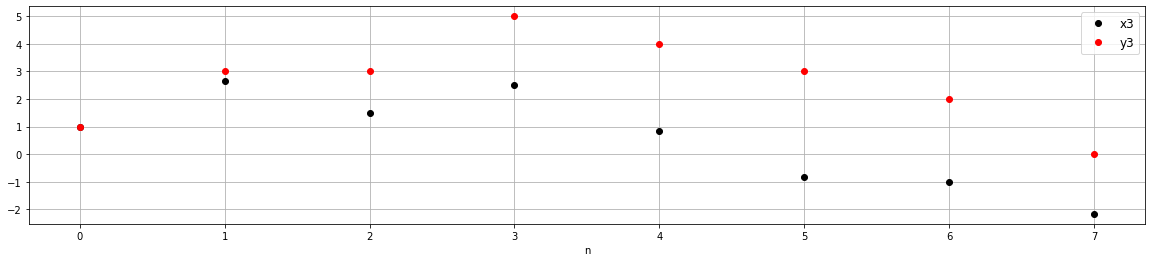

In [10]:
n3 = np.arange (0,8)
x3 = np.array ([ 1 , 8/3 , 3/2 , 5/2 , 5/6 , -5/6 , -1 , -13/6 ])
y3 = np.array ([ 1 , 3 , 3 , 5 , 4 , 3 , 2 ,0 ])

plt.figure (figsize=(20,4))
plt.plot (n3,x3,"ko",label="x3")
plt.plot (n3,y3,"ro",label="y3")
plt.xlabel ("n")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

In [11]:
# OTRA FORMA

n3b = np.arange(0,10,dtype=float)
y3b = np.array([0,0,1,3,3,5,4,3,2,0])
x3b = np.zeros(len(y3b)-2)
for i in np.arange(len(x3b)): 
    x3b[i] = - (1/3) * y3b[i+1] - 1/2*y3b[i] + y3b[i+2]
nx3b = np.arange(len(x3b))

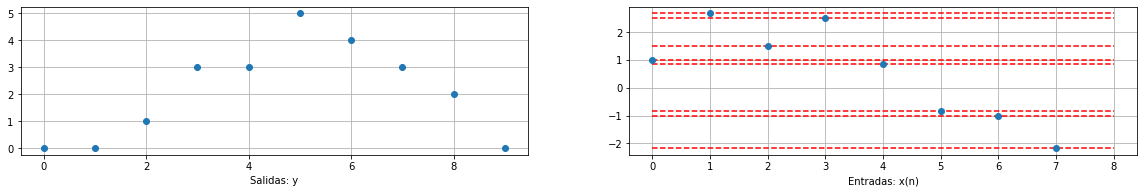

In [12]:
plt.figure(figsize= (20,6))
plt.subplot(2,2,1)
plt.plot(n3b,y3b,'o')
plt.xlabel('n')
plt.xlabel('Salidas: y')
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(nx3b,x3b,'o')
plt.xlabel('n')
plt.xlabel('Entradas: x(n)')
plt.hlines([1, 2.66,0.83,2.5,1.5,-0.83,-1,-2.16],0,8,linestyles="--",color="red")
plt.grid(True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-20 a la(s) 20.51.36.png">

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-22 a la(s) 17.52.15.png">

## Apartado A

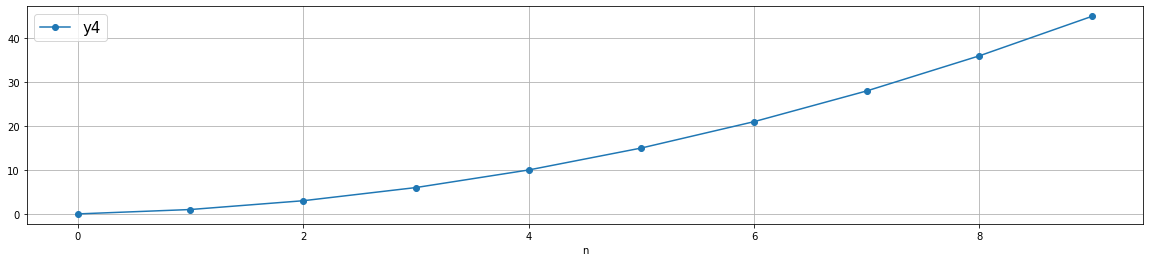

In [15]:
n4 = np.arange (0,10)
y4 = lambda n: np.piecewise (n, [(n>=0)], [lambda n: n*(n+1)/2,lambda n: 0])

plt.figure (figsize=(20,4))
plt.plot (n4,y4(n4),"o-",label="y4")
plt.xlabel ("n")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

## Apartado B

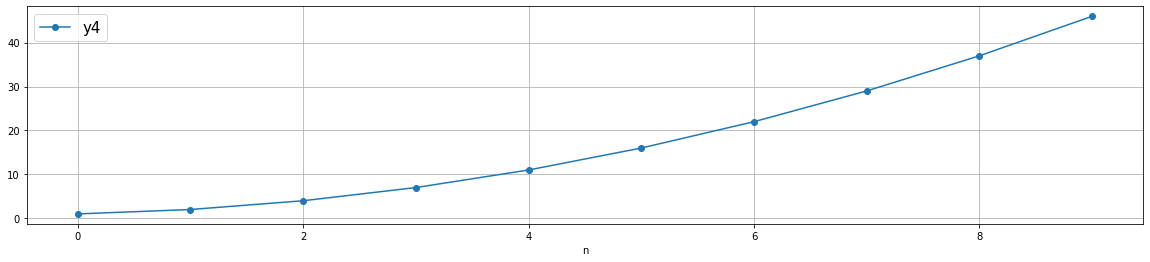

In [16]:
n4b = np.arange (0,10)
y4b = lambda n: np.piecewise (n, [(n>=0)], [lambda n: 1+n*(n+1)/2,lambda n: 0])

plt.figure (figsize=(20,4))
plt.plot (n4b,y4b(n4b),"o-",label="y4")
plt.xlabel ("n")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()